# **Installing & Importing**

## Installing

In [ ]:
!pip install Jinja2==3.1.2
!pip install klib
!pip install missingpy

In [ ]:
!pip install mixed-naive-bayes

from mixed_naive_bayes import MixedNB

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing

In [ ]:
import numpy as np
import pandas as pd
import klib
import warnings

from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import model_selection 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score,  balanced_accuracy_score
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode

import matplotlib.pyplot as plt
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

from missingpy import MissForest

warnings.filterwarnings('ignore')

### MixedNB

In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)

x = df.drop (['class'], axis=1)
y = df['class']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
xl = x[['sex','steroid','antivirals','fatigue','malaise','anorexia','liver_big',
        'liver_firm','spleen_palpable','spiders','ascites','varices','histology'
        ]].apply(LabelEncoder().fit_transform).copy()
xl = xl.join(x[['age','bilirubin','alk_phosphate','sgot','albumin','protime']])
yl = le.fit_transform(y)

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(xl, yl, test_size=0.5, stratify=yl, random_state=75)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(xl, yl, test_size=0.4, stratify=yl, random_state=75)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(xl, yl, test_size=0.3, stratify=yl, random_state=75)
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(xl, yl, test_size=0.2, stratify=yl, random_state=75)
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(xl, yl, test_size=0.1, stratify=yl, random_state=75)

from mixed_naive_bayes import MixedNB
mnb = MixedNB(categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12])

y_pred_1 = mnb.fit(x_train_1, y_train_1).predict(x_test_1)
y_pred_2 = mnb.fit(x_train_2, y_train_2).predict(x_test_2)
y_pred_3 = mnb.fit(x_train_3, y_train_3).predict(x_test_3)
y_pred_4 = mnb.fit(x_train_4, y_train_4).predict(x_test_4)
y_pred_5 = mnb.fit(x_train_5, y_train_5).predict(x_test_5)

print("Nilai akurasi komposisi 50:50 adalah {:.2f}%".format(metrics.accuracy_score(y_test_1, y_pred_1) * 100))
print("Nilai akurasi komposisi 60:40 adalah {:.2f}%".format(metrics.accuracy_score(y_test_2, y_pred_2) * 100))
print("Nilai akurasi komposisi 70:30 adalah {:.2f}%".format(metrics.accuracy_score(y_test_3, y_pred_3) * 100))
print("Nilai akurasi komposisi 80:20 adalah {:.2f}%".format(metrics.accuracy_score(y_test_4, y_pred_4) * 100))
print("Nilai akurasi komposisi 90:10 adalah {:.2f}%".format(metrics.accuracy_score(y_test_5, y_pred_5) * 100))

Nilai akurasi komposisi 50:50 adalah 85.00%
Nilai akurasi komposisi 60:40 adalah 93.75%
Nilai akurasi komposisi 70:30 adalah 91.67%
Nilai akurasi komposisi 80:20 adalah 93.75%
Nilai akurasi komposisi 90:10 adalah 100.00%


#### Confusion Matrix

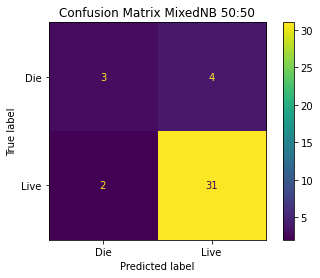

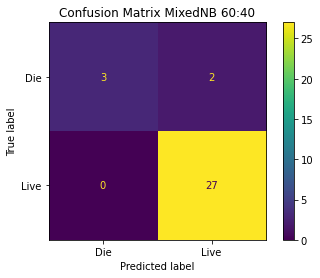

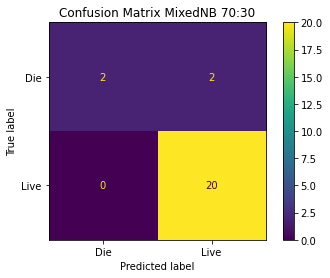

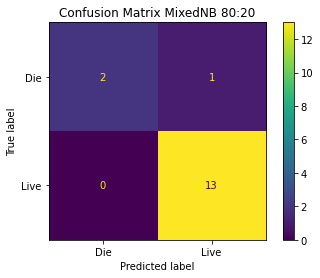

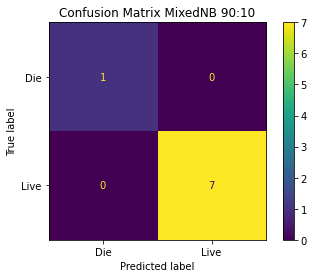

In [ ]:
list_class = ['Die','Live']

disp_1 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test_1, y_pred_1), 
                                        display_labels=list_class)
disp_1.plot()
plt.title("Confusion Matrix MixedNB 50:50")
plt.show()
print ( )

disp_2 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test_2, y_pred_2), 
                                        display_labels=list_class)
disp_2.plot()
plt.title("Confusion Matrix MixedNB 60:40")
plt.show()
print ( )

disp_3 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test_3, y_pred_3), 
                                        display_labels=list_class)
disp_3.plot()
plt.title("Confusion Matrix MixedNB 70:30")
plt.show()
print ( )

disp_4 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test_4, y_pred_4), 
                                        display_labels=list_class)
disp_4.plot()
plt.title("Confusion Matrix MixedNB 80:20")
plt.show()
print ( )

disp_5 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test_5, y_pred_5), 
                                        display_labels=list_class)
disp_5.plot()
plt.title("Confusion Matrix MixedNB 90:10")
plt.show()

#### Classification Report

In [ ]:
print('Clasification report NB 50:50')
print(classification_report(y_test_1, y_pred_1))
print('\nClasification report NB 60:40')
print(classification_report(y_test_2, y_pred_2))
print('\nClasification report NB 70:30')
print(classification_report(y_test_3, y_pred_3))
print('\nClasification report NB 80:20')
print(classification_report(y_test_4, y_pred_4))
print('\nClasification report NB 90:10')
print(classification_report(y_test_5, y_pred_5))

Clasification report NB 50:50
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.91      0.88      0.89        33

    accuracy                           0.82        40
   macro avg       0.70      0.73      0.71        40
weighted avg       0.84      0.82      0.83        40


Clasification report NB 60:40
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.88      0.88      0.88        26

    accuracy                           0.81        32
   macro avg       0.69      0.69      0.69        32
weighted avg       0.81      0.81      0.81        32


Clasification report NB 70:30
              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.89      0.85      0.87        20

    accuracy                           0.79        24
   macro avg       0.65      0.68   

#### Plot AUC ROC 

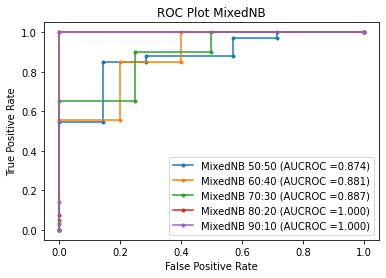

In [ ]:
y_dec_1 = mnb.fit(x_train_1, y_train_1).predict_proba(x_test_1)[:, 1]
y_dec_2 = mnb.fit(x_train_2, y_train_2).predict_proba(x_test_2)[:, 1]
y_dec_3 = mnb.fit(x_train_3, y_train_3).predict_proba(x_test_3)[:, 1]
y_dec_4 = mnb.fit(x_train_4, y_train_4).predict_proba(x_test_4)[:, 1]
y_dec_5 = mnb.fit(x_train_5, y_train_5).predict_proba(x_test_5)[:, 1]

fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(y_test_1, y_dec_1, pos_label=1)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_dec_2, pos_label=1)
fpr_3, tpr_3, thresholds_3 = metrics.roc_curve(y_test_3, y_dec_3, pos_label=1)
fpr_4, tpr_4, thresholds_4 = metrics.roc_curve(y_test_4, y_dec_4, pos_label=1)
fpr_5, tpr_5, thresholds_5 = metrics.roc_curve(y_test_5, y_dec_5, pos_label=1)

plt.plot(fpr_1, tpr_1, marker='.', label="MixedNB 50:50 (AUCROC ={:.3f})".format(auc(fpr_1, tpr_1)))
plt.plot(fpr_2, tpr_2, marker='.', label="MixedNB 60:40 (AUCROC ={:.3f})".format(auc(fpr_2, tpr_2)))
plt.plot(fpr_3, tpr_3, marker='.', label="MixedNB 70:30 (AUCROC ={:.3f})".format(auc(fpr_3, tpr_3)))
plt.plot(fpr_4, tpr_4, marker='.', label="MixedNB 80:20 (AUCROC ={:.3f})".format(auc(fpr_4, tpr_4)))
plt.plot(fpr_5, tpr_5, marker='.', label="MixedNB 90:10 (AUCROC ={:.3f})".format(auc(fpr_5, tpr_5)))

plt.title('ROC Plot MixedNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Balanced Accuracy

In [ ]:
print("Balanced Accuracy 50:50 adalah {:.2f}%".format(metrics.balanced_accuracy_score(y_test_1, y_pred_1)*100))
print("Balanced Accuracy 60:40 adalah {:.2f}%".format(metrics.balanced_accuracy_score(y_test_2, y_pred_2)*100))
print("Balanced Accuracy 70:30 adalah {:.2f}%".format(metrics.balanced_accuracy_score(y_test_3, y_pred_3)*100))
print("Balanced Accuracy 80:20 adalah {:.2f}%".format(metrics.balanced_accuracy_score(y_test_4, y_pred_4)*100))
print("Balanced Accuracy 90:10 adalah {:.2f}%".format(metrics.balanced_accuracy_score(y_test_5, y_pred_5)*100))

Balanced Accuracy 50:50 adalah 68.40%
Balanced Accuracy 60:40 adalah 80.00%
Balanced Accuracy 70:30 adalah 75.00%
Balanced Accuracy 80:20 adalah 83.33%
Balanced Accuracy 90:10 adalah 100.00%


### MixedNB + MF

In [ ]:
df = pd.read_excel('hepatitis_pres.xlsx')
df.drop(df.columns[0], axis=1, inplace=True)

x = df.drop (['class'], axis=1)
y = df['class']

x_imp = x
x_imp.to_excel('hepatitis_missforest.xlsx', index=False)

imputer = MissForest(max_iter=10,
                     n_estimators=100,
                     class_weight='balanced',
                     random_state=75)
x_imp = imputer.fit_transform(x)

df_imp = pd.DataFrame(x_imp, columns=x.columns)
df_imp['class'] = y
x_imp = df_imp.drop(['class'], axis=1)
x_imp.to_excel('imputed_missforest.xlsx', index=False)

x_train_6, x_test_6, y_train_6, y_test_6 = train_test_split(x_imp, y, test_size=0.5, stratify=y, random_state=75)
x_train_7, x_test_7, y_train_7, y_test_7 = train_test_split(x_imp, y, test_size=0.4, stratify=y, random_state=75)
x_train_8, x_test_8, y_train_8, y_test_8 = train_test_split(x_imp, y, test_size=0.3, stratify=y, random_state=75)
x_train_9, x_test_9, y_train_9, y_test_9 = train_test_split(x_imp, y, test_size=0.2, stratify=y, random_state=75)
x_train_10, x_test_10, y_train_10, y_test_10 = train_test_split(x_imp, y, test_size=0.1, stratify=y, random_state=75)

mnb = MixedNB()

y_pred_6 = mnb.fit(x_train_6, y_train_6).predict(x_test_6)
y_pred_7 = mnb.fit(x_train_7, y_train_7).predict(x_test_7)
y_pred_8 = mnb.fit(x_train_8, y_train_8).predict(x_test_8)
y_pred_9 = mnb.fit(x_train_9, y_train_9).predict(x_test_9)
y_pred_10 = mnb.fit(x_train_10, y_train_10).predict(x_test_10)

print( )
print("Nilai akurasi komposisi 50:50 adalah {:.2f}%".format(metrics.accuracy_score(y_test_6, y_pred_6) * 100))
print("Nilai akurasi komposisi 60:40 adalah {:.2f}%".format(metrics.accuracy_score(y_test_7, y_pred_7) * 100))
print("Nilai akurasi komposisi 70:30 adalah {:.2f}%".format(metrics.accuracy_score(y_test_8, y_pred_8) * 100))
print("Nilai akurasi komposisi 80:20 adalah {:.2f}%".format(metrics.accuracy_score(y_test_9, y_pred_9) * 100))
print("Nilai akurasi komposisi 90:10 adalah {:.2f}%".format(metrics.accuracy_score(y_test_10, y_pred_10) * 100))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3

Nilai akurasi komposisi 50:50 adalah 83.33%
Nilai akurasi komposisi 60:40 adalah 82.26%
Nilai akurasi komposisi 70:30 adalah 80.85%
Nilai akurasi komposisi 80:20 adalah 83.87%
Nilai akurasi komposisi 90:10 adalah 81.25%


#### Confusion Matrix

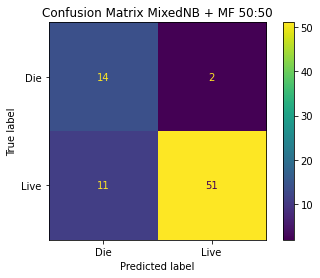

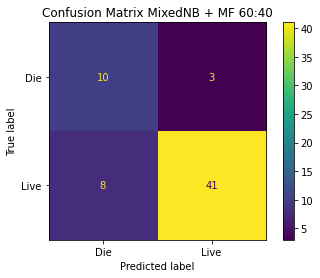

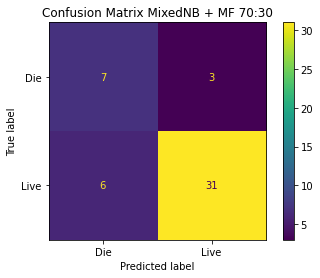

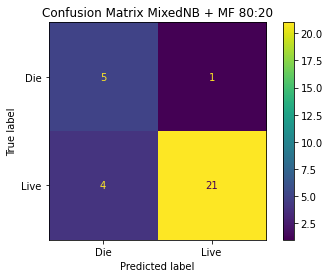

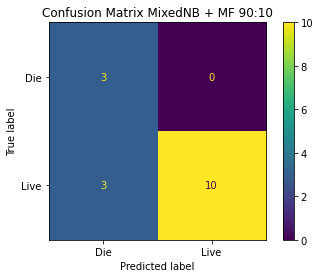

In [ ]:
list_class = ['Die','Live']

disp_6 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test_6, y_pred_6), 
                                        display_labels=list_class)
disp_6.plot()
plt.title("Confusion Matrix MixedNB + MF 50:50")
plt.show()
print ( )

disp_7 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test_7, y_pred_7), 
                                        display_labels=list_class)
disp_7.plot()
plt.title("Confusion Matrix MixedNB + MF 60:40")
plt.show()
print ( )

disp_8 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test_8, y_pred_8), 
                                        display_labels=list_class)
disp_8.plot()
plt.title("Confusion Matrix MixedNB + MF 70:30")
plt.show()
print ( )

disp_9 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                        (y_test_9, y_pred_9), 
                                        display_labels=list_class)
disp_9.plot()
plt.title("Confusion Matrix MixedNB + MF 80:20")
plt.show()
print ( )

disp_10 = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix
                                         (y_test_10, y_pred_10), 
                                         display_labels=list_class)
disp_10.plot()
plt.title("Confusion Matrix MixedNB + MF 90:10")
plt.show()

#### Classification Report

In [ ]:
print('Clasification report NB 50:50')
print(classification_report(y_test_6, y_pred_6))
print('\nClasification report NB 60:40')
print(classification_report(y_test_7, y_pred_7))
print('\nClasification report NB 70:30')
print(classification_report(y_test_8, y_pred_8))
print('\nClasification report NB 80:20')
print(classification_report(y_test_9, y_pred_9))
print('\nClasification report NB 90:10')
print(classification_report(y_test_10, y_pred_10))

Clasification report NB 50:50
              precision    recall  f1-score   support

           0       0.56      0.88      0.68        16
           1       0.96      0.82      0.89        62

    accuracy                           0.83        78
   macro avg       0.76      0.85      0.78        78
weighted avg       0.88      0.83      0.85        78


Clasification report NB 60:40
              precision    recall  f1-score   support

           0       0.56      0.77      0.65        13
           1       0.93      0.84      0.88        49

    accuracy                           0.82        62
   macro avg       0.74      0.80      0.76        62
weighted avg       0.85      0.82      0.83        62


Clasification report NB 70:30
              precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.91      0.84      0.87        37

    accuracy                           0.81        47
   macro avg       0.73      0.77   

#### Plot AUC ROC

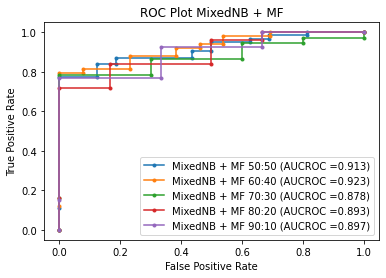

In [ ]:
y_dec_6 = mnb.fit(x_train_6, y_train_6).predict_proba(x_test_6)[:, 1]
y_dec_7 = mnb.fit(x_train_7, y_train_7).predict_proba(x_test_7)[:, 1]
y_dec_8 = mnb.fit(x_train_8, y_train_8).predict_proba(x_test_8)[:, 1]
y_dec_9 = mnb.fit(x_train_9, y_train_9).predict_proba(x_test_9)[:, 1]
y_dec_10 = mnb.fit(x_train_10, y_train_10).predict_proba(x_test_10)[:, 1]

fpr_6, tpr_6, thresholds_6 = metrics.roc_curve(y_test_6, y_dec_6, pos_label=1)
fpr_7, tpr_7, thresholds_7 = metrics.roc_curve(y_test_7, y_dec_7, pos_label=1)
fpr_8, tpr_8, thresholds_8 = metrics.roc_curve(y_test_8, y_dec_8, pos_label=1)
fpr_9, tpr_9, thresholds_9 = metrics.roc_curve(y_test_9, y_dec_9, pos_label=1)
fpr_10, tpr_10, thresholds_10 = metrics.roc_curve(y_test_10, y_dec_10, pos_label=1)

plt.plot(fpr_6, tpr_6, marker='.', label="MixedNB + MF 50:50 (AUCROC ={:.3f})".format(auc(fpr_6, tpr_6)))
plt.plot(fpr_7, tpr_7, marker='.', label="MixedNB + MF 60:40 (AUCROC ={:.3f})".format(auc(fpr_7, tpr_7)))
plt.plot(fpr_8, tpr_8, marker='.', label="MixedNB + MF 70:30 (AUCROC ={:.3f})".format(auc(fpr_8, tpr_8)))
plt.plot(fpr_9, tpr_9, marker='.', label="MixedNB + MF 80:20 (AUCROC ={:.3f})".format(auc(fpr_9, tpr_9)))
plt.plot(fpr_10, tpr_10, marker='.', label="MixedNB + MF 90:10 (AUCROC ={:.3f})".format(auc(fpr_10, tpr_10)))

plt.title('ROC Plot MixedNB + MF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Balanced Accuracy

In [ ]:
print("Balanced Accuracy 50:50 adalah {:.2f}%".format(metrics.balanced_accuracy_score(y_test_6, y_pred_6)*100))
print("Balanced Accuracy 60:40 adalah {:.2f}%".format(metrics.balanced_accuracy_score(y_test_7, y_pred_7)*100))
print("Balanced Accuracy 70:30 adalah {:.2f}%".format(metrics.balanced_accuracy_score(y_test_8, y_pred_8)*100))
print("Balanced Accuracy 80:20 adalah {:.2f}%".format(metrics.balanced_accuracy_score(y_test_9, y_pred_9)*100))
print("Balanced Accuracy 90:10 adalah {:.2f}%".format(metrics.balanced_accuracy_score(y_test_10, y_pred_10)*100))

Balanced Accuracy 50:50 adalah 84.88%
Balanced Accuracy 60:40 adalah 80.30%
Balanced Accuracy 70:30 adalah 76.89%
Balanced Accuracy 80:20 adalah 83.67%
Balanced Accuracy 90:10 adalah 88.46%


Pohon MissForest

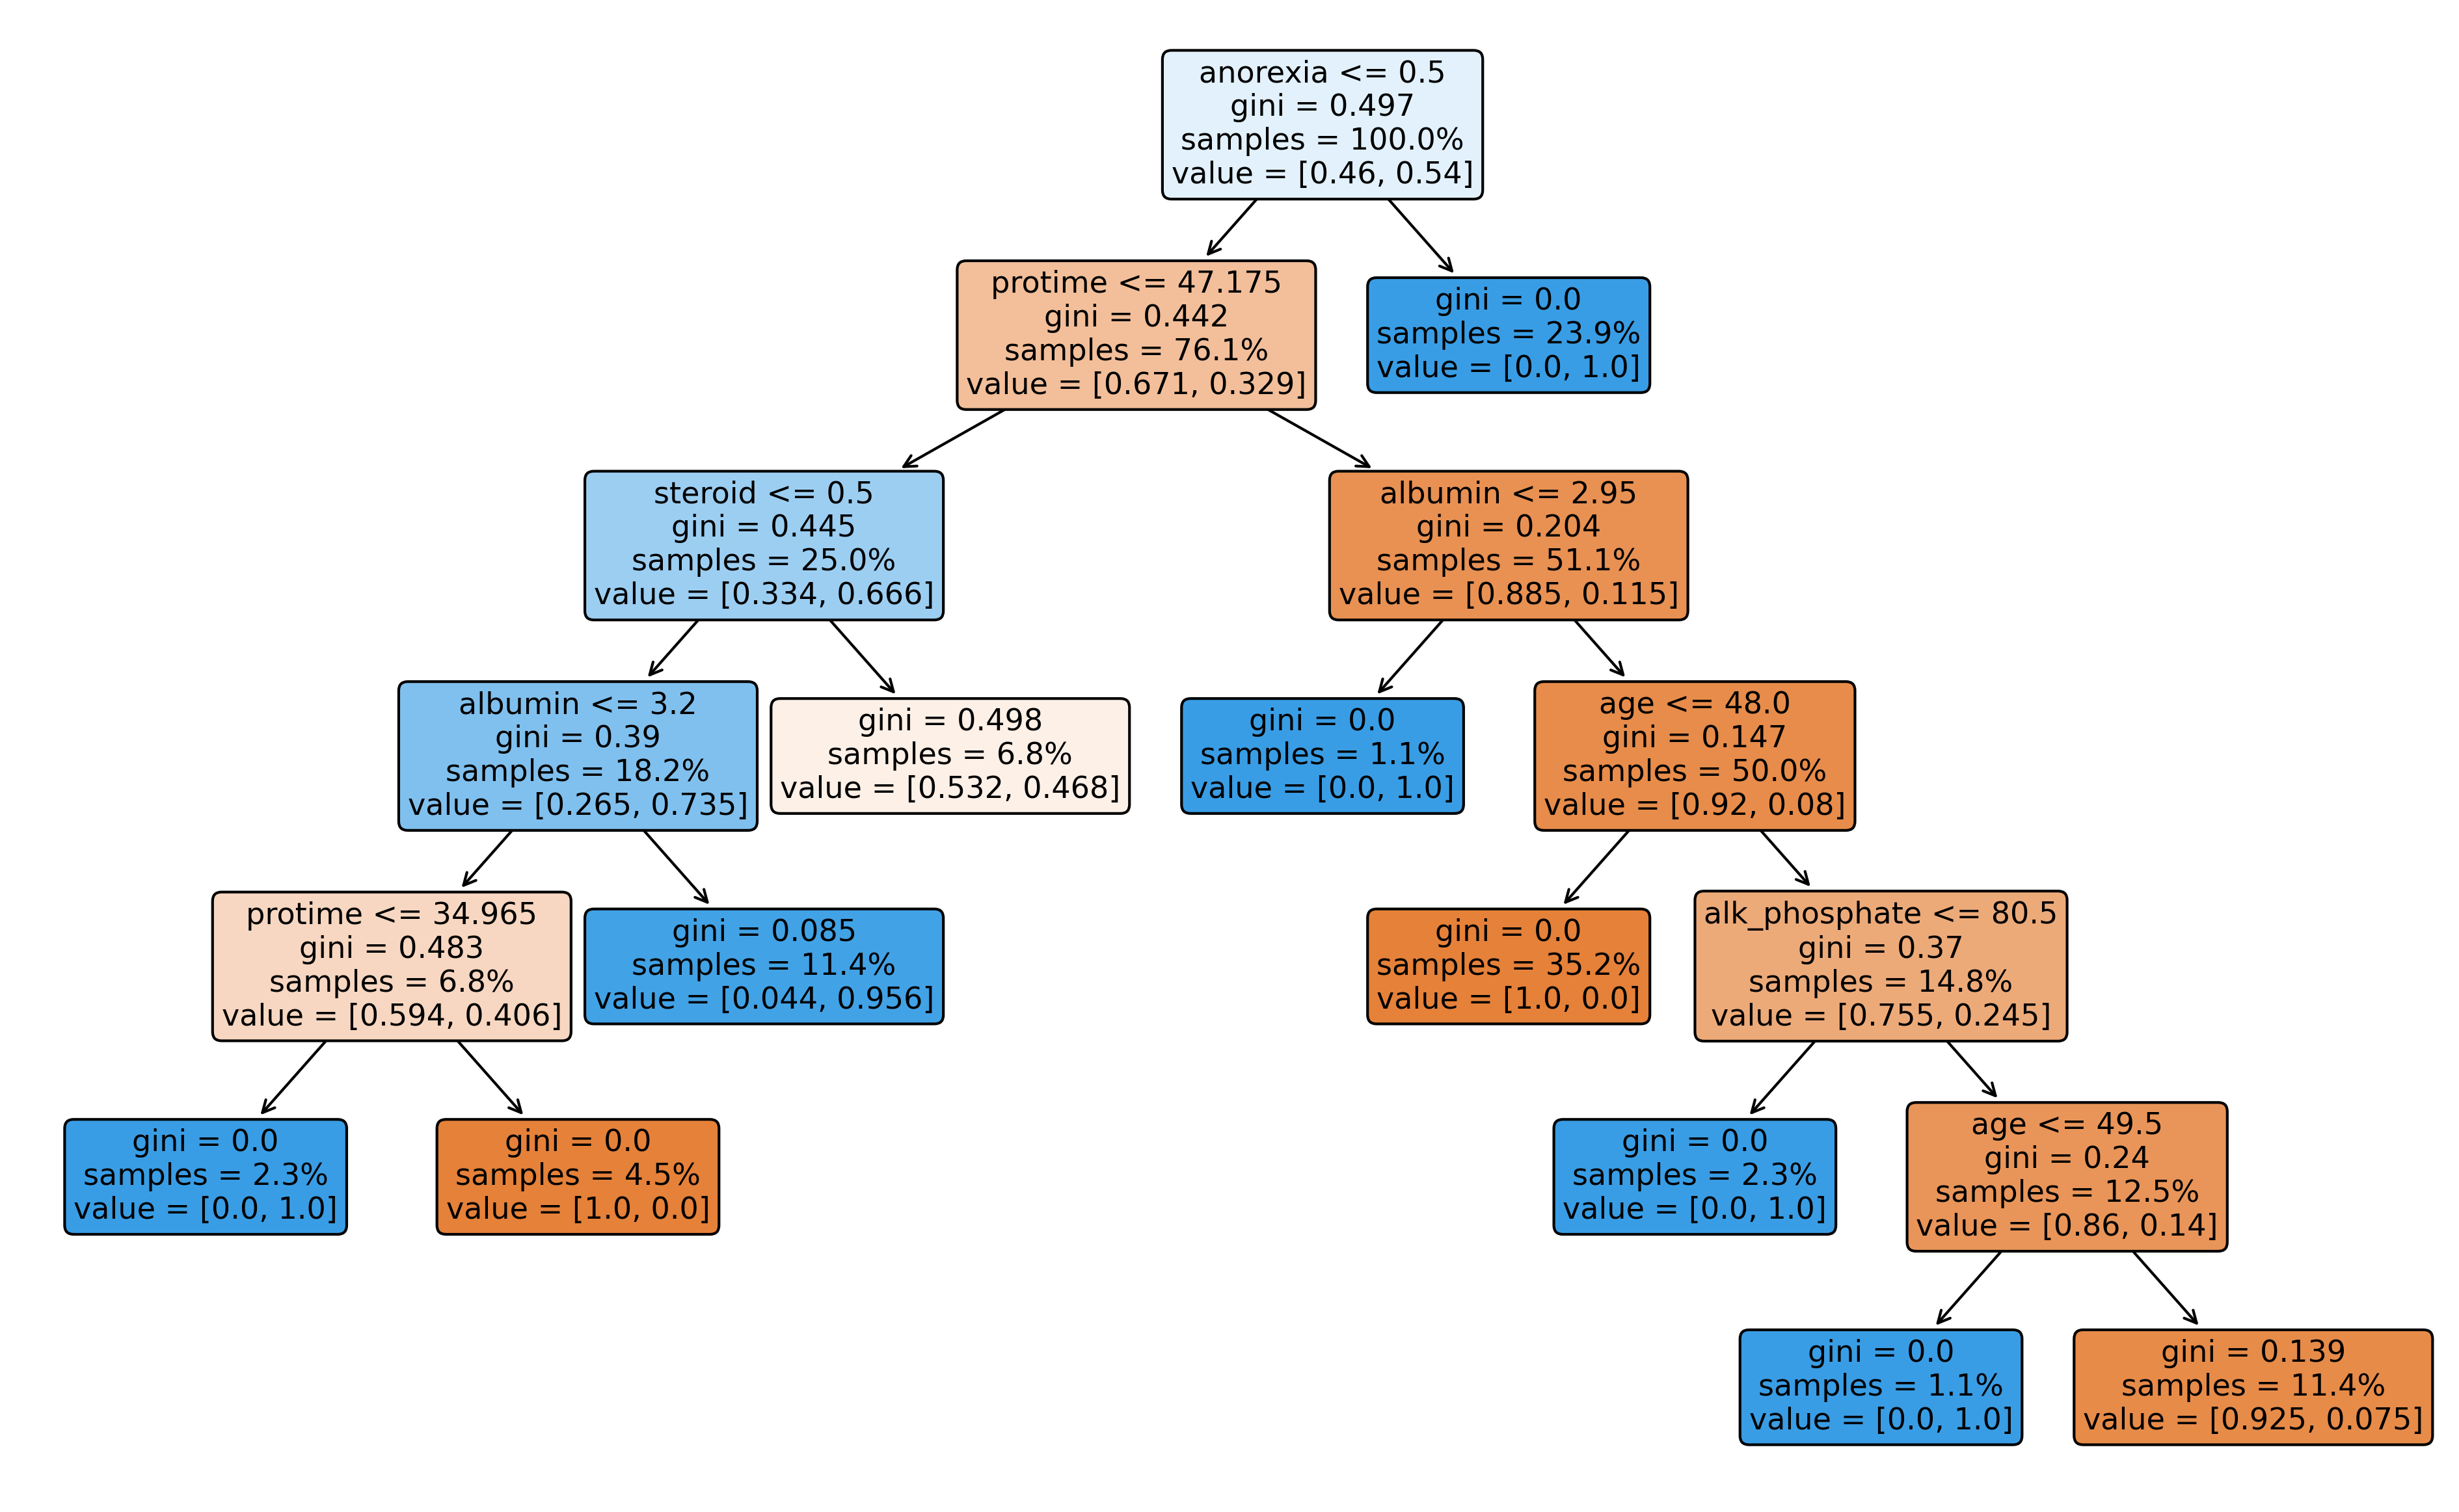

In [ ]:
from matplotlib import pyplot as plt

df = pd.read_excel('hepatitis_missforest.xlsx')

x = df.drop(['malaise'], axis=1) 
y = df['malaise'] 

pohon = RandomForestClassifier(n_estimators=100, 
                               max_leaf_nodes=10,
                               class_weight='balanced',
                               random_state=75)
pohon.fit(x, y.values.ravel())

plt.figure(figsize=(16,10), dpi=300)

_ = tree.plot_tree(pohon.estimators_[99], 
                   feature_names=x.columns,
                   proportion=True,
                   filled=True, 
                   rounded=True)